## Импортирую нужные модули для работы с сырыми данными

In [24]:
import pandas as pd

import os
import numpy as np
from zipfile import ZipFile

## Объявляю путь до файлов с начальными данными и создаю словарь эмоций

In [25]:
PATH = 'input'
emotions = {
    0: "Angry", 
    1: "Disgust",
    2: "Fear",
    3: "Happy",
    4: "Sad",
    5: "Surprise",
    6: "Neutral",
}

## Разархивирую данные

In [26]:
# zip_data = "challenges-in-representation-learning-facial-expression-recognition-challenge.zip"

# with ZipFile(zip_data, 'r') as zip_: 
#     zip_.extractall(os.getcwd()+'/'+PATH)

## Получаю все данные из файла

In [27]:
raw_data = pd.read_csv(os.path.join(PATH, "icml_face_data.csv"))

## Просматриваю описание данных

Имеется 35887 строк данных и имена столбцов, которые содержат данные (эмоции, пиксели, использование)

In [28]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   emotion  35887 non-null  int64 
 1    Usage   35887 non-null  object
 2    pixels  35887 non-null  object
dtypes: int64(1), object(2)
memory usage: 841.2+ KB


## Проверяю часть записей

- emotion - целое число (0-6 эмоций)
- pixels - строка с разделёнными целыми числами
- Usage - категориальный атрибут

Пиксели - целые числа, и, так как изображения находятся в оттенках серого (из описания), поэтому они будут находиться в диапазоне 0-255

In [29]:
print(raw_data.shape)
raw_data.head()

(35887, 3)


,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


## Исправляю названия колонок таблицы

Убираю ненужные пробелы

In [30]:
print(raw_data.keys())
raw_data.columns = ['emotion', 'Usage', 'pixels']
print(raw_data.keys())

Index(['emotion', ' Usage', ' pixels'], dtype='object')
Index(['emotion', 'Usage', 'pixels'], dtype='object')


## Получаю больше данных

Данные уже разделены для тестирования (Training, PublicTest, PrivateTest)

In [31]:
raw_data["Usage"].value_counts()

Training       28709
PublicTest      3589
PrivateTest     3589
Name: Usage, dtype: int64

## Трансформирую входные пиксели

In [32]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


def show_image_and_label(x, y):
    x_reshaped = x.reshape(48, 48)
    plt.imshow(x_reshaped, cmap="gray", interpolation="nearest")
    plt.axis("off")
    plt.show()
    print("Emotion: ", y)

In [33]:
# x_pixels
img = raw_data["pixels"][0]
val = img.split(" ")
x_pixels = np.array(val, 'float32')
x_pixels /= 255

## Вот как выглядит первое изображение

(0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral)

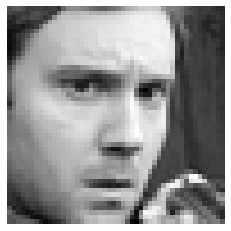

Emotion:  0


In [34]:
show_image_and_label(x_pixels, raw_data["emotion"][0])

## Разбиваю данные

Делю данные на test, train, validation на основании Usage

In [35]:
test_dataset = raw_data.loc[raw_data["Usage"] == 'PublicTest', ['emotion', 'pixels']]
train_dataset = raw_data.loc[raw_data["Usage"] == 'Training', ['emotion', 'pixels']]
validation_dataset = raw_data.loc[raw_data["Usage"] == 'PrivateTest', ['emotion', 'pixels']]

## Проверяю данные

In [36]:
validation_dataset.head()

,emotion,pixels
32298,0,170 118 101 88 88 75 78 82 66 74 68 59 63 64 6...
32299,5,7 5 8 6 7 3 2 6 5 4 4 5 7 5 5 5 6 7 7 7 10 10 ...
32300,6,232 240 241 239 237 235 246 117 24 24 22 13 12...
32301,4,200 197 149 139 156 89 111 58 62 95 113 117 11...
32302,2,40 28 33 56 45 33 31 78 152 194 200 186 196 20...


In [37]:
test_dataset.head()

,emotion,pixels
28709,0,254 254 254 254 254 249 255 160 2 58 53 70 77 ...
28710,1,156 184 198 202 204 207 210 212 213 214 215 21...
28711,4,69 118 61 60 96 121 103 87 103 88 70 90 115 12...
28712,6,205 203 236 157 83 158 120 116 94 86 155 180 2...
28713,3,87 79 74 66 74 96 77 80 80 84 83 89 102 91 84 ...


## Обрабатываю изображения

Преобразовываю dataset`ы пикселей в массивы

In [38]:
def pixels_to_array(pixels):
    array = np.array(pixels.split(), 'uint8')
    return array


def image_reshape(data):
    image = np.reshape(data['pixels'].to_list(), (data.shape[0],48,48,1))
    image = np.repeat(image,3,-1)
    return image

In [39]:
train_dataset['pixels'] = train_dataset['pixels'].apply(pixels_to_array)
test_dataset['pixels'] = test_dataset['pixels'].apply(pixels_to_array)
validation_dataset['pixels'] = validation_dataset['pixels'].apply(pixels_to_array)

print("Train:")
print(type(train_dataset['pixels']))
print(train_dataset.shape)

print("Validation:")
print(type(validation_dataset['pixels']))
print(validation_dataset.shape)

print("Test:")
print(type(test_dataset['pixels']))
print(test_dataset.shape)

X_train = image_reshape(train_dataset)
y_train = train_dataset['emotion']
print(X_train.shape)

X_test = image_reshape(test_dataset)
y_test = test_dataset['emotion']
print(X_test.shape)

X_val = image_reshape(validation_dataset)
y_val = validation_dataset['emotion']
print(X_val.shape)

Train:
<class 'pandas.core.series.Series'>
(28709, 2)
Validation:
<class 'pandas.core.series.Series'>
(3589, 2)
Test:
<class 'pandas.core.series.Series'>
(3589, 2)
(28709, 48, 48, 3)
(3589, 48, 48, 3)
(3589, 48, 48, 3)


## Аугументирую данные

Метод аугментации (увеличения данных искусственно) генерирует разные версии реального набора данных, чтобы увеличить его размер.

### Перевожу массив пикселей в картинки и сохраняю по папкам

In [40]:
import cv2

def images_in_dir(dir, data, y, save_prefix="Data_"):
  numbers_name = np.arange(1,1000000)
  for i in range(len(data)):
    namefile = save_prefix+ str(numbers_name[i]) +".png"
    cv2.imwrite(os.path.join(dir,str(y[i]),namefile), data[i])

In [41]:
y_train, y_val, y_test = np.array(y_train), np.array(y_val), np.array(y_test)

In [42]:
dataset_dir = "./dataset"
train_dir = "./dataset/train"
validation_dir = "./dataset/validation"
test_dir = "./dataset/test"

os.makedirs(dataset_dir,exist_ok=True)
os.makedirs(train_dir,exist_ok=True)
os.makedirs(validation_dir,exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

labels = [0,1,2,3,4,5,6]

for label in labels:
    os.makedirs(os.path.join(train_dir, str(label)), exist_ok=True)
    os.makedirs(os.path.join(validation_dir, str(label)), exist_ok=True)
    os.makedirs(os.path.join(test_dir, str(label)), exist_ok=True)

numbers_name = np.arange(1,1000000)

images_in_dir(train_dir, X_train, y_train)
images_in_dir(validation_dir, X_val, y_val)
images_in_dir(test_dir, X_test, y_test)

## Keras Image Augmentation API

Для аугументации данных я выбрал класс ImageDataGenerator, который определяет конфигурацию для подготовки и дополнения данных изображения.
#### Сюда входят такие возможности, как:
- Стандартизация по образцам.
- Стандартизация по функциям.
- ZCA отбеливание.
- Случайное вращение, сдвиги, сдвиг и флипы.
- Переупорядочивание размеров.
- Сохраняйте дополненные изображения на диск.

Также он простой и мощный

In [43]:
from keras.preprocessing.image import ImageDataGenerator

standard_datagen = ImageDataGenerator(rescale=1./255, featurewise_center=True, featurewise_std_normalization=True)
rotation_datagen = ImageDataGenerator(rescale=1./255, rotation_range=90)
shift = 0.2
shift_datagen = ImageDataGenerator(rescale=1./255, width_shift_range=shift, height_shift_range=shift)
flip_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, vertical_flip=True)

batch = int(train_dataset.shape[0] / 4)
# batch = 64


Я решил создать несколько генераторов с разными свойствами, чтобы аугументированные изображения отличались

In [44]:
standard_datagen.fit(X_train)
rotation_datagen.fit(X_train)
shift_datagen.fit(X_train)
flip_datagen.fit(X_train)

# standard_datagen.fit(X_val)
# rotation_datagen.fit(X_val)
# shift_datagen.fit(X_val)
# flip_datagen.fit(X_val)

### Получение аугументированных изображений из итераторов

Создаю новые изображения, сохраняю их в папку, показываю часть

In [45]:
aug_X_train = []
aug_y_train = []

def plot_iterator(direct, train_loader):
  x, y = train_loader.next()
  images_in_dir(direct, x, y, save_prefix="aug_Data_")
  plt.rcParams["figure.figsize"] = [16,16]
  for i in range(0,20):
    plt.subplot(7,5,i+1)
    image = x[i]
    plt.imshow(image)
    plt.axis('off')
  plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

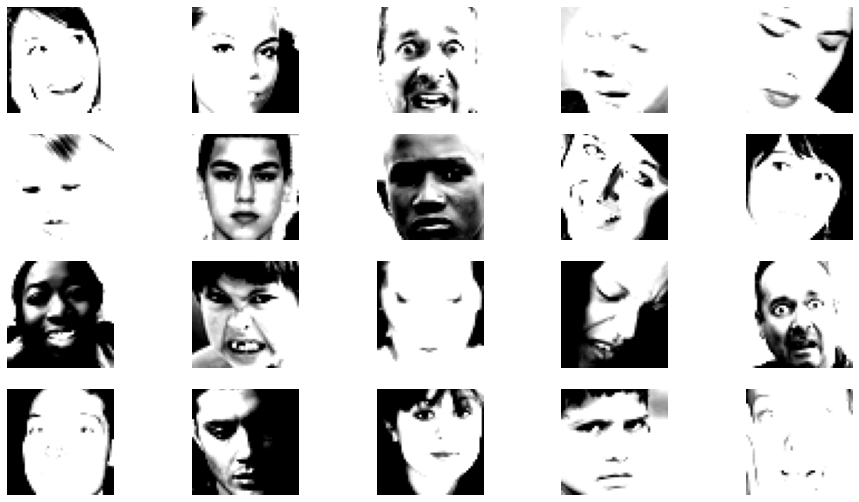

In [46]:
train_loader = standard_datagen.flow(X_train, y_train, batch_size=batch) # , save_to_dir='aug_images/train', save_prefix='aug', save_format='png'
# val_loader = standard_datagen.flow(X_train, y_train, batch_size=batch) # , save_to_dir='aug_images/val', save_prefix='aug', save_format='png'
plot_iterator(train_dir, train_loader)
# plot_iterator(validation_dir, val_loader)

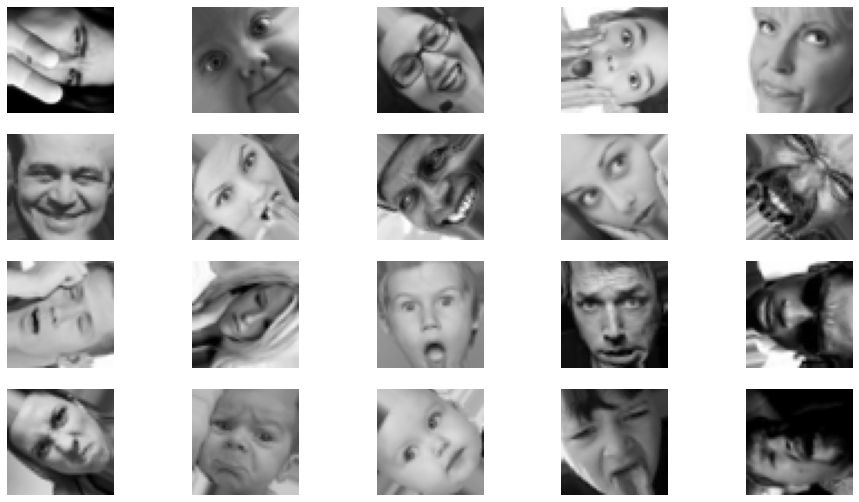

In [47]:
# train_loader = rotation_datagen.flow(X_train, y_train, batch_size=batch, save_to_dir='aug_images/train', save_prefix='aug', save_format='png')
# val_loader = rotation_datagen.flow(X_train, y_train, batch_size=batch, save_to_dir='aug_images/val', save_prefix='aug', save_format='png')
train_loader = rotation_datagen.flow(X_train, y_train, batch_size=batch) # , save_to_dir='aug_images/train', save_prefix='aug', save_format='png'
# val_loader = rotation_datagen.flow(X_train, y_train, batch_size=batch) # , save_to_dir='aug_images/val', save_prefix='aug', save_format='png'
# plot_iterator(train_loader)
# plot_iterator(val_loader)
plot_iterator(train_dir, train_loader)
# plot_iterator(validation_dir, val_loader)

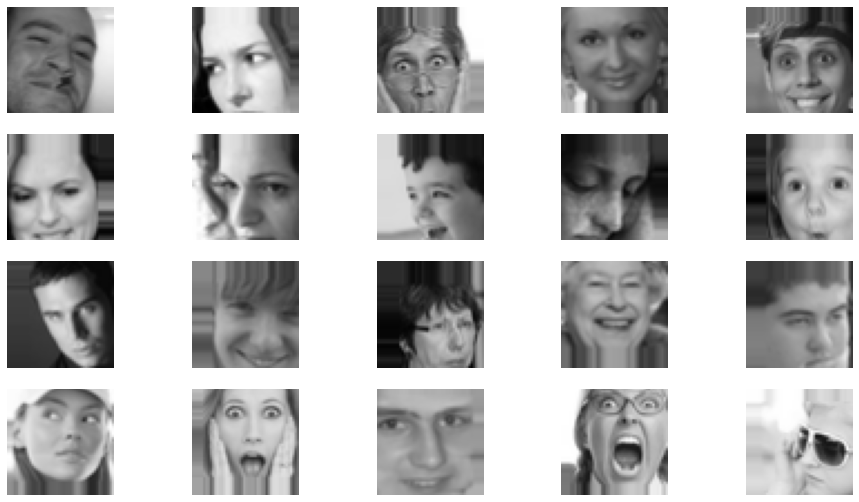

In [48]:
# train_loader = shift_datagen.flow(X_train, y_train, batch_size=batch, save_to_dir='aug_images/train', save_prefix='aug', save_format='png')
# val_loader = shift_datagen.flow(X_train, y_train, batch_size=batch, save_to_dir='aug_images/val', save_prefix='aug', save_format='png')
train_loader = shift_datagen.flow(X_train, y_train, batch_size=batch) # , save_to_dir='aug_images/train', save_prefix='aug', save_format='png'
# val_loader = shift_datagen.flow(X_train, y_train, batch_size=batch) # , save_to_dir='aug_images/val', save_prefix='aug', save_format='png'

# plot_iterator(train_loader)
# plot_iterator(val_loader)
plot_iterator(train_dir, train_loader)
# plot_iterator(validation_dir, val_loader)

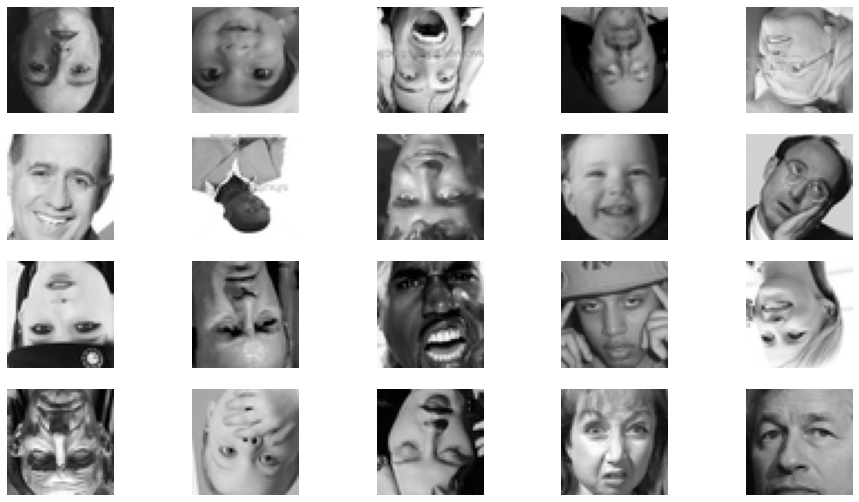

In [49]:
# train_loader = flip_datagen.flow(X_train, y_train, batch_size=batch, save_to_dir='aug_images/train', save_prefix='aug', save_format='png')
# val_loader = flip_datagen.flow(X_train, y_train, batch_size=batch, save_to_dir='aug_images/val', save_prefix='aug', save_format='png')
train_loader = flip_datagen.flow(X_train, y_train, batch_size=batch) # , save_to_dir='aug_images/train', save_prefix='aug', save_format='png'
# val_loader = flip_datagen.flow(X_train, y_train, batch_size=batch) # , save_to_dir='aug_images/val', save_prefix='aug', save_format='png'

# plot_iterator(train_loader)
# plot_iterator(val_loader)
plot_iterator(train_dir, train_loader)
# plot_iterator(validation_dir, val_loader)

## Создаю модель

In [62]:
import tensorflow as tf 
from tensorflow import keras


def Dense_model():
    input_shape_densenet = (48, 48, 3)
    densenet_model = keras.applications.densenet.DenseNet201(
        include_top=False,
        weights="imagenet",
        input_tensor=None,
        input_shape=input_shape_densenet
    )

    densenet_model.trainable = True


    input = keras.Input(shape=(48, 48, 3))
    layer = densenet_model(inputs=input)
    layer = keras.layers.Flatten()(layer)
    layer = keras.layers.Dense(units=512, activation='relu')(layer)
    layer = keras.layers.Dropout(0.4)(layer)
    layer = keras.layers.Dense(units=256, activation='relu')(layer)
    layer = keras.layers.Dropout(0.4)(layer)
    layer = keras.layers.Dense(units=128, activation='relu')(layer)
    layer = keras.layers.Dropout(0.3)(layer)
    output = keras.layers.Dense(units=7, activation='softmax')(layer)

    model = keras.models.Model(inputs=input, outputs=output)
    return model
        

In [51]:
model = Dense_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 densenet201 (Functional)    (None, 1, 1, 1920)        18321984  
                                                                 
 flatten (Flatten)           (None, 1920)              0         
                                                                 
 dense (Dense)               (None, 512)               983552    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0     

### функция тренировки модели

In [59]:
from keras import optimizers
from sklearn.utils import class_weight


def modelfit(model,trainloader, valloader, epochs,lr, steps, ClassW: bool = False):
    NUM_EPOCHS = epochs 

    # Otimizators
    adam = tf.keras.optimizers.Adam(learning_rate=lr) 
    rms = optimizers.rmsprop_v2.RMSProp(lr)
    sgd = optimizers.gradient_descent_v2.SGD(lr)
    adelta = optimizers.adadelta_v2.Adadelta(lr)
    adagrad = optimizers.adagrad_v2.Adagrad(lr)

    model.compile(adam, loss='categorical_crossentropy', metrics=['accuracy'])
    
    es = tf.keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        mode='max',
        verbose=1,
        patience=7,
        min_delta=1e-3,
        restore_best_weights=True
    )

    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.1,
        patience=2,
        min_lr=0.000001,
        mode='min'
    )

    if ClassW:
        class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(trainloader.classes), y=trainloader.classes)
        weight = {i : class_weights[i] for i in range(7)} # convert list to dictionary
        print("Class Weight: ", weight)

        history=model.fit(
            train_loader, 
            epochs= NUM_EPOCHS,
            validation_data = valloader,
            shuffle= True,
            steps_per_epoch= steps,
            callbacks=[es,reduce_lr],
            class_weight=weight
        )
    else:
        history=model.fit(
            train_loader, 
            epochs= NUM_EPOCHS,
            validation_data = valloader,
            shuffle= True,
            steps_per_epoch= steps,
            callbacks=[es,reduce_lr]
        )

    return history

# Тренировка модели

### функция для получения итератора с изображениями из папок

In [55]:
def loader(dir_train, dir_val, batch):
    train_datagen = ImageDataGenerator(
    rescale = 1./255
    )

    train_loader = train_datagen.flow_from_directory(
        directory= dir_train,
        target_size=(48, 48),
        color_mode="rgb",
        batch_size=batch,
        class_mode="categorical",
        shuffle=True,
        seed=123456
    )

    val_loader = train_datagen.flow_from_directory(
        directory=dir_val,
        target_size=(48, 48),
        color_mode="rgb",
        batch_size=batch,
        class_mode="categorical",
        shuffle=True,
        seed=123456
    )

    return train_loader, val_loader

In [63]:
model = Dense_model()
train_loader, val_loader = loader("./dataset/train", "./dataset/validation", 64)
list_model = []
list_model.append(modelfit(
  model=model,
  trainloader=train_loader,
  valloader=val_loader,
  epochs=5,
  lr=0.0001,
  steps=500 // 64,
  ClassW=False
))

Found 50878 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.
Epoch 1/5
7/7 [==============================] - 69s 7s/step - loss: 2.0956 - accuracy: 0.1853 - val_loss: 1.9460 - val_accuracy: 0.1875 - lr: 1.0000e-04
Epoch 2/5
7/7 [==============================] - 45s 7s/step - loss: 2.0498 - accuracy: 0.1853 - val_loss: 1.9170 - val_accuracy: 0.1962 - lr: 1.0000e-04
Epoch 3/5
7/7 [==============================] - 51s 8s/step - loss: 1.9951 - accuracy: 0.1920 - val_loss: 1.8961 - val_accuracy: 0.2017 - lr: 1.0000e-04
Epoch 4/5
7/7 [==============================] - 52s 8s/step - loss: 2.0036 - accuracy: 0.1496 - val_loss: 1.8868 - val_accuracy: 0.2106 - lr: 1.0000e-04
Epoch 5/5
7/7 [==============================] - 53s 8s/step - loss: 1.9850 - accuracy: 0.1607 - val_loss: 1.8848 - val_accuracy: 0.2151 - lr: 1.0000e-04


In [64]:
score = model.evaluate(val_loader, verbose=1)

57/57 [==============================] - 27s 471ms/step - loss: 1.8848 - accuracy: 0.2151
